# Intro to Deep Learning Image Classification




.
+--proj5-image-classification.ipynb
+--cars_train
|  +--00001.jpg
|  +--00002.jpg
|  +--...
+--cars_test
|  +--00001.jpg
|  +--00002.jpg
|  +--...
+--test_annos.json
+--train_annos.json
```

```Python
from torch.utils.data import Dataset, DataLoader

class MyDataset(Dataset):
    def __init__(self):
        super(MyDataset, self).__init__()
#         TODO: implement what happens when someone calls:
#         dataset = MyDataset()
    
    def __getitem__(self, idx):
#         TODO: implement what happens when someone calls dataset[idx]
#         This typically will return an image and its label
    
    def __len__(self):
#         TODO: implement what happens when someone calls len(dataset)

dataset = MyDataset()
loader = DataLoader(dataset)
for im, label in loader:
#     TODO: Perform operations
```


In [ ]:
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim




In [ ]:
# Your Code Here...
!wget https://students.cs.byu.edu/~catalys1/CS450-W24/projects/files/Stanford_cars_dataset.zip
!unzip Stanford_cars_dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: cars_train/03148.jpg    
  inflating: cars_train/03149.jpg    
  inflating: cars_train/03150.jpg    
  inflating: cars_train/03151.jpg    
  inflating: cars_train/03152.jpg    
  inflating: cars_train/03153.jpg    
  inflating: cars_train/03154.jpg    
  inflating: cars_train/03155.jpg    
  inflating: cars_train/03156.jpg    
  inflating: cars_train/03157.jpg    
  inflating: cars_train/03158.jpg    
  inflating: cars_train/03159.jpg    
  inflating: cars_train/03160.jpg    
  inflating: cars_train/03161.jpg    
  inflating: cars_train/03162.jpg    
  inflating: cars_train/03163.jpg    
  inflating: cars_train/03164.jpg    
  inflating: cars_train/03165.jpg    
  inflating: cars_train/03166.jpg    
  inflating: cars_train/03167.jpg    
  inflating: cars_train/03168.jpg    
  inflating: cars_train/03169.jpg    
  inflating: cars_train/03170.jpg    
  inflating: cars_train/03171.jpg    
  inflating: cars_train/03172.jpg    

In [ ]:
from torch.utils.data import Dataset, DataLoader
import json
import os
import torch
import pandas as pd
from skimage import io, transform
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from torchvision import transforms, utils

device = 'cuda'

class MyDataset(Dataset):
    def __init__(self, root_dir,labels, train, transform=None):
        super(MyDataset, self).__init__()
#         TODO: implement what happens when someone calls:
        json_file = open(labels)
        self.image_car_types = json.load(json_file)
        self.root_dir = root_dir
        self.transform = transform
        self.train = train

        self.images = []
        for im in self.image_car_types:
          self.images.append(im)


    def __len__(self):
        return len(self.image_car_types)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        img_name = os.path.join(self.root_dir,self.images[idx])
        image = io.imread(img_name)

        if len(image.shape) != 3:
          image = cv.cvtColor(image,cv.COLOR_GRAY2RGB)

        image = cv.resize(image, (224,224))

        if self.transform:
            image = self.transform(image)

        c_type = self.image_car_types[self.images[idx]]


        return image, c_type

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225])])

trainset = MyDataset(root_dir='cars_train/',labels='train_annos.json', train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=100,
                                          shuffle=True, num_workers=8)

testset = MyDataset(root_dir='cars_test/',labels='test_annos.json' , train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=100,
                                         shuffle=False, num_workers=8)


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [ ]:
print(len(trainset))
test_image, test_type = trainset[0]
print(test_type)


8144
14


# Part B: Neural Network Architecture


In [ ]:
import torchvision
model = torchvision.models.resnet18(pretrained=True)
print(list(model.__dict__["_modules"].keys()))

['conv1', 'bn1', 'relu', 'maxpool', 'layer1', 'layer2', 'layer3', 'layer4', 'avgpool', 'fc']


In [ ]:
print(model.fc)

Linear(in_features=512, out_features=1000, bias=True)


In [ ]:

print(model.fc)
num_features = model.fc.in_features

# Additional linear layer and dropout layer
model.fc = nn.Sequential(
    nn.Linear(num_features, 256),  # Additional linear layer with 256 output features
    nn.ReLU(inplace=True),         # Activation function (you can choose other activation functions too)
    nn.Dropout(0.5),               # Dropout layer with 50% probability
    nn.Linear(256, 196)    # Final prediction fc layer
)
print(model.fc)

Linear(in_features=512, out_features=1000, bias=True)
Sequential(
  (0): Linear(in_features=512, out_features=256, bias=True)
  (1): ReLU(inplace=True)
  (2): Dropout(p=0.5, inplace=False)
  (3): Linear(in_features=256, out_features=196, bias=True)
)


In [ ]:
model = model.to(device)

# Part C: Training



[1,    20] loss: 5.200
[1,    40] loss: 5.047
[1,    60] loss: 4.845
[1,    80] loss: 4.681
[2,    20] loss: 4.294
[2,    40] loss: 4.206
[2,    60] loss: 4.038
[2,    80] loss: 3.984
[3,    20] loss: 3.693
[3,    40] loss: 3.539
[3,    60] loss: 3.459
[3,    80] loss: 3.340
[4,    20] loss: 3.081
[4,    40] loss: 2.978
[4,    60] loss: 2.970
[4,    80] loss: 2.876
[5,    20] loss: 2.598
[5,    40] loss: 2.571
[5,    60] loss: 2.545
[5,    80] loss: 2.434
[6,    20] loss: 2.198
[6,    40] loss: 2.136
[6,    60] loss: 2.111
[6,    80] loss: 2.081
[7,    20] loss: 1.843
[7,    40] loss: 1.790
[7,    60] loss: 1.791
[7,    80] loss: 1.761
[8,    20] loss: 1.602
[8,    40] loss: 1.543
[8,    60] loss: 1.519
[8,    80] loss: 1.444
[9,    20] loss: 1.359
[9,    40] loss: 1.275
[9,    60] loss: 1.254
[9,    80] loss: 1.238
[10,    20] loss: 1.139
[10,    40] loss: 1.088
[10,    60] loss: 1.069
[10,    80] loss: 1.016
[11,    20] loss: 0.927
[11,    40] loss: 0.936
[11,    60] loss: 0.908
[11,

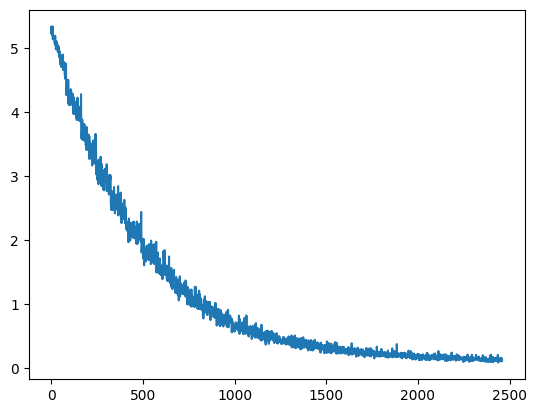

In [ ]:

optimizer = optim.Adagrad(model.parameters(), lr=0.001)
loss_fn = nn.CrossEntropyLoss()

losses = []
for epoch in range(30):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        loss = loss_fn(outputs, labels-1)
        loss.backward()
        optimizer.step()

        # print statistics
        losses.append(loss.item())
        running_loss += loss.item()
        if i % 20 == 19:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 20))
            running_loss = 0.0

print('Finished Training')
plt.plot(losses)

# Part D: Testing





Accuracy: 67.14941155741064


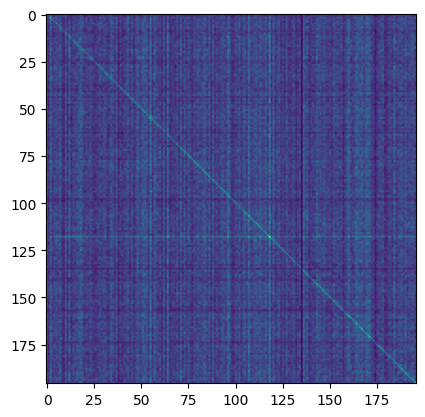

In [ ]:
model.eval()

class_correct = list(0. for i in range(196))
class_total = list(0. for i in range(196))
confusion_matrix = np.zeros((196,196))

with torch.no_grad():
    for data in testloader:
        images, labels = data
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        _, predicted = torch.max(outputs, 1)

        c = (predicted == labels-1).squeeze()

        for i in range(len(labels)):
          for j in range(len(predicted)):
            confusion_matrix[labels[i]-1][predicted[j]] += 1


        for i in range(len(labels)):
            label = labels[i-1]
            class_correct[label-1] += c[i].item()
            class_total[label-1] += 1

total_accuracy = 0
for i in range(196):
    total_accuracy += (100 * class_correct[i] / class_total[i])
total_accuracy = total_accuracy/196
print("\n")
print("Accuracy: " + str(total_accuracy))
plt.imshow(confusion_matrix)

Below is the different optimizers trained on 5 epochs and their respective plots.  A short analysis is below the code.

SGD Optimizer

In [ ]:
model = torchvision.models.resnet18(pretrained=True)
num_features = model.fc.in_features

# Additional linear layer and dropout layer
model.fc = nn.Sequential(
    nn.Linear(num_features, 256),  # Additional linear layer with 256 output features
    nn.ReLU(inplace=True),         # Activation function (you can choose other activation functions too)
    nn.Dropout(0.5),               # Dropout layer with 50% probability
    nn.Linear(256, 196)    # Final prediction fc layer
)
model = model.to(device)

[1,    20] loss: 5.331
[1,    40] loss: 5.286
[1,    60] loss: 5.277
[1,    80] loss: 5.262
[2,    20] loss: 5.217
[2,    40] loss: 5.213
[2,    60] loss: 5.204
[2,    80] loss: 5.191
[3,    20] loss: 5.143
[3,    40] loss: 5.115
[3,    60] loss: 5.091
[3,    80] loss: 5.085
[4,    20] loss: 5.016
[4,    40] loss: 4.971
[4,    60] loss: 4.950
[4,    80] loss: 4.860
[5,    20] loss: 4.805
[5,    40] loss: 4.735
[5,    60] loss: 4.698
[5,    80] loss: 4.658
Finished Training


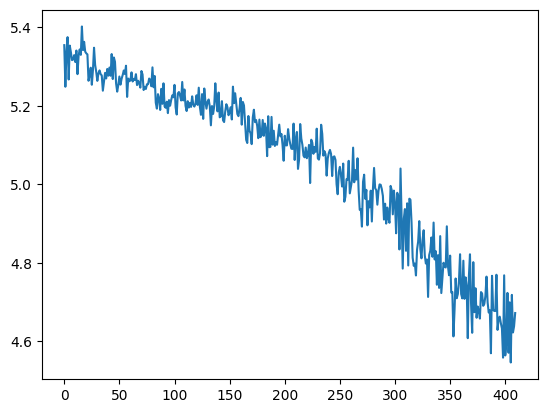

In [ ]:
# Your Code Here
optimizer = optim.SGD(model.parameters(), lr=0.002, momentum=0.9)
loss_fn = nn.CrossEntropyLoss()

losses = []
for epoch in range(5):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        loss = loss_fn(outputs, labels-1)
        loss.backward()
        optimizer.step()

        # print statistics
        losses.append(loss.item())
        running_loss += loss.item()
        if i % 20 == 19:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 20))
            running_loss = 0.0

print('Finished Training')
plt.plot(losses)



Accuracy: 8.725624422942161


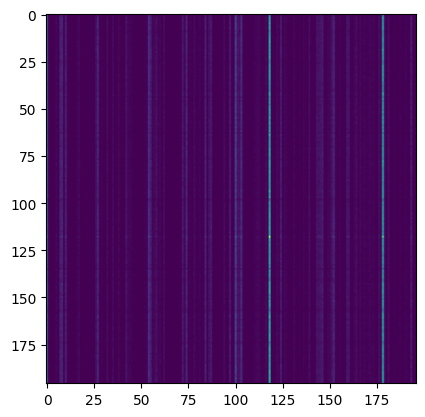

In [ ]:
model.eval()

class_correct = list(0. for i in range(196))
class_total = list(0. for i in range(196))
confusion_matrix = np.zeros((196,196))

with torch.no_grad():
    for data in testloader:
        images, labels = data
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        _, predicted = torch.max(outputs, 1)

        c = (predicted == labels-1).squeeze()

        for i in range(len(labels)):
          for j in range(len(predicted)):
            confusion_matrix[labels[i]-1][predicted[j]] += 1


        for i in range(len(labels)):
            label = labels[i-1]
            class_correct[label-1] += c[i].item()
            class_total[label-1] += 1

total_accuracy = 0
for i in range(196):
    total_accuracy += (100 * class_correct[i] / class_total[i])
total_accuracy = total_accuracy/196
print("\n")
print("Accuracy: " + str(total_accuracy))
plt.imshow(confusion_matrix)

Adam Optimizer

In [ ]:
model = torchvision.models.resnet18(pretrained=True)
num_features = model.fc.in_features

# Additional linear layer and dropout layer
model.fc = nn.Sequential(
    nn.Linear(num_features, 256),  # Additional linear layer with 256 output features
    nn.ReLU(inplace=True),         # Activation function (you can choose other activation functions too)
    nn.Dropout(0.5),               # Dropout layer with 50% probability
    nn.Linear(256, 196)    # Final prediction fc layer
)
model = model.to(device)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


[1,    20] loss: 5.291
[1,    40] loss: 5.200
[1,    60] loss: 5.086
[1,    80] loss: 4.911


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


[2,    20] loss: 4.668
[2,    40] loss: 4.439
[2,    60] loss: 4.271
[2,    80] loss: 4.179
[3,    20] loss: 3.813
[3,    40] loss: 3.669
[3,    60] loss: 3.609
[3,    80] loss: 3.480
[4,    20] loss: 3.155
[4,    40] loss: 3.082
[4,    60] loss: 2.940
[4,    80] loss: 2.909
[5,    20] loss: 2.603
[5,    40] loss: 2.549
[5,    60] loss: 2.466
[5,    80] loss: 2.397
Finished Training


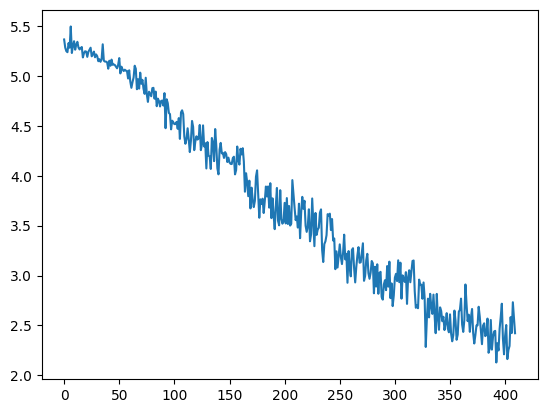

In [ ]:
# Your Code Here
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, betas=(0.9, 0.999), eps=1e-08, weight_decay=0)
loss_fn = nn.CrossEntropyLoss()

losses = []
for epoch in range(5):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        loss = loss_fn(outputs, labels-1)
        loss.backward()
        optimizer.step()

        # print statistics
        losses.append(loss.item())
        running_loss += loss.item()
        if i % 20 == 19:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 20))
            running_loss = 0.0

print('Finished Training')
plt.plot(losses)



Accuracy: 29.39740484331819


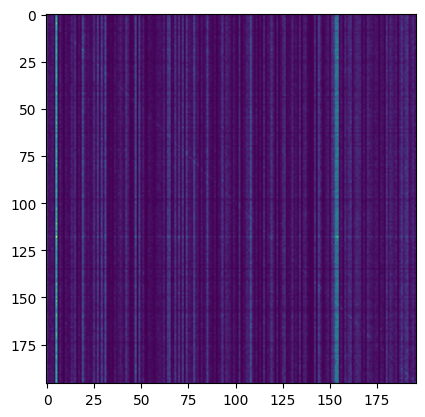

In [ ]:
model.eval()

class_correct = list(0. for i in range(196))
class_total = list(0. for i in range(196))
confusion_matrix = np.zeros((196,196))

with torch.no_grad():
    for data in testloader:
        images, labels = data
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        _, predicted = torch.max(outputs, 1)

        c = (predicted == labels-1).squeeze()

        for i in range(len(labels)):
          for j in range(len(predicted)):
            confusion_matrix[labels[i]-1][predicted[j]] += 1


        for i in range(len(labels)):
            label = labels[i-1]
            class_correct[label-1] += c[i].item()
            class_total[label-1] += 1

total_accuracy = 0
for i in range(196):
    total_accuracy += (100 * class_correct[i] / class_total[i])
total_accuracy = total_accuracy/196
print("\n")
print("Accuracy: " + str(total_accuracy))
plt.imshow(confusion_matrix)

Adagrad optimizer

In [ ]:
model = torchvision.models.resnet18(pretrained=True)
num_features = model.fc.in_features

# Additional linear layer and dropout layer
model.fc = nn.Sequential(
    nn.Linear(num_features, 256),  # Additional linear layer with 256 output features
    nn.ReLU(inplace=True),         # Activation function (you can choose other activation functions too)
    nn.Dropout(0.5),               # Dropout layer with 50% probability
    nn.Linear(256, 196)    # Final prediction fc layer
)
model = model.to(device)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


[1,    20] loss: 5.303
[1,    40] loss: 5.167
[1,    60] loss: 5.038
[1,    80] loss: 4.874
[2,    20] loss: 4.523
[2,    40] loss: 4.363
[2,    60] loss: 4.182
[2,    80] loss: 4.016
[3,    20] loss: 3.560
[3,    40] loss: 3.414
[3,    60] loss: 3.231
[3,    80] loss: 3.151
[4,    20] loss: 2.691
[4,    40] loss: 2.600
[4,    60] loss: 2.505
[4,    80] loss: 2.386
[5,    20] loss: 2.009
[5,    40] loss: 1.918
[5,    60] loss: 1.848
[5,    80] loss: 1.756
Finished Training


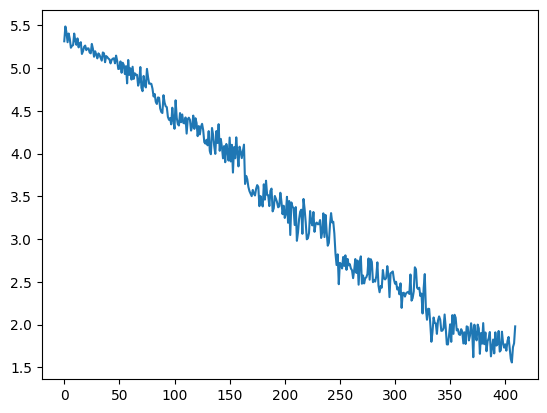

In [ ]:
# Your Code Here
optimizer = optim.Adagrad(model.parameters(), lr=0.002)
loss_fn = nn.CrossEntropyLoss()

losses = []
for epoch in range(5):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        loss = loss_fn(outputs, labels-1)
        loss.backward()
        optimizer.step()

        # print statistics
        losses.append(loss.item())
        running_loss += loss.item()
        if i % 20 == 19:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 20))
            running_loss = 0.0

print('Finished Training')
plt.plot(losses)



Accuracy: 49.33116683006096


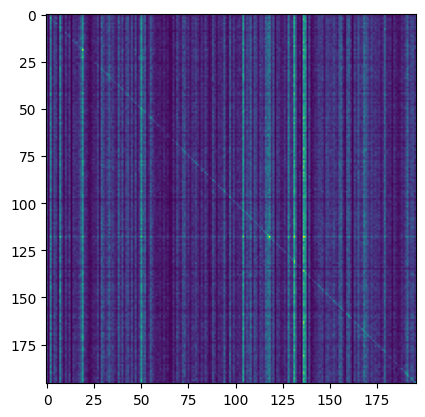

In [ ]:
model.eval()

class_correct = list(0. for i in range(196))
class_total = list(0. for i in range(196))
confusion_matrix = np.zeros((196,196))

with torch.no_grad():
    for data in testloader:
        images, labels = data
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        _, predicted = torch.max(outputs, 1)

        c = (predicted == labels-1).squeeze()

        for i in range(len(labels)):
          for j in range(len(predicted)):
            confusion_matrix[labels[i]-1][predicted[j]] += 1


        for i in range(len(labels)):
            label = labels[i-1]
            class_correct[label-1] += c[i].item()
            class_total[label-1] += 1

total_accuracy = 0
for i in range(196):
    total_accuracy += (100 * class_correct[i] / class_total[i])
total_accuracy = total_accuracy/196
print("\n")
print("Accuracy: " + str(total_accuracy))
plt.imshow(confusion_matrix)

I thought that the adam optimizer would by far do the best, but the random new one I chose learned incredibly fast.  The adagrad optimizer was impressive and I switched the primary training to this optimizer for the best results.

Below is the different learning rates trained on 5 epochs and their respective plots.  A short analysis is below the code.


Learning rate of .01

In [ ]:
model = torchvision.models.resnet18(pretrained=True)
num_features = model.fc.in_features

# Additional linear layer and dropout layer
model.fc = nn.Sequential(
    nn.Linear(num_features, 256),  # Additional linear layer with 256 output features
    nn.ReLU(inplace=True),         # Activation function (you can choose other activation functions too)
    nn.Dropout(0.5),               # Dropout layer with 50% probability
    nn.Linear(256, 196)    # Final prediction fc layer
)
model = model.to(device)

[1,    20] loss: 5.438
[1,    40] loss: 5.281
[1,    60] loss: 5.283
[1,    80] loss: 5.286
[2,    20] loss: 5.276
[2,    40] loss: 5.278
[2,    60] loss: 5.280
[2,    80] loss: 5.280
[3,    20] loss: 5.271
[3,    40] loss: 5.278
[3,    60] loss: 5.282
[3,    80] loss: 5.282
[4,    20] loss: 5.275
[4,    40] loss: 5.277
[4,    60] loss: 5.280
[4,    80] loss: 5.280
[5,    20] loss: 5.274
[5,    40] loss: 5.274
[5,    60] loss: 5.282
[5,    80] loss: 5.283
Finished Training


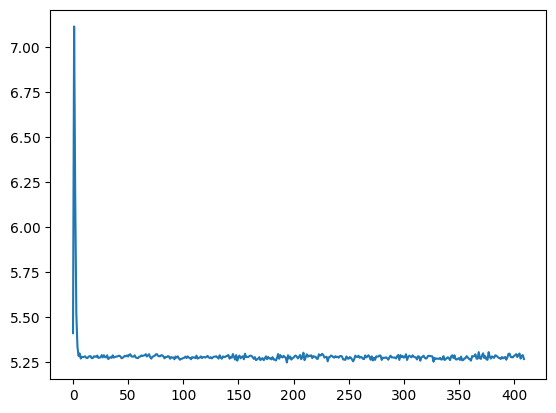

In [ ]:
# Your Code Here
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, betas=(0.9, 0.999), eps=1e-08, weight_decay=0)
loss_fn = nn.CrossEntropyLoss()

losses = []
for epoch in range(5):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        loss = loss_fn(outputs, labels-1)
        loss.backward()
        optimizer.step()

        # print statistics
        losses.append(loss.item())
        running_loss += loss.item()
        if i % 20 == 19:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 20))
            running_loss = 0.0

print('Finished Training')
plt.plot(losses)



Accuracy: 0.828037625073468


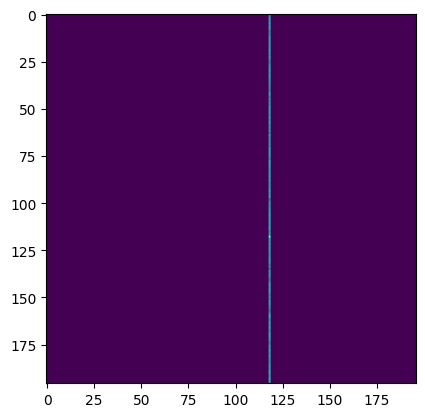

In [ ]:
model.eval()

class_correct = list(0. for i in range(196))
class_total = list(0. for i in range(196))
confusion_matrix = np.zeros((196,196))

with torch.no_grad():
    for data in testloader:
        images, labels = data
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        _, predicted = torch.max(outputs, 1)

        c = (predicted == labels-1).squeeze()

        for i in range(len(labels)):
          for j in range(len(predicted)):
            confusion_matrix[labels[i]-1][predicted[j]] += 1


        for i in range(len(labels)):
            label = labels[i-1]
            class_correct[label-1] += c[i].item()
            class_total[label-1] += 1

total_accuracy = 0
for i in range(196):
    total_accuracy += (100 * class_correct[i] / class_total[i])
total_accuracy = total_accuracy/196
print("\n")
print("Accuracy: " + str(total_accuracy))
plt.imshow(confusion_matrix)

Learning rate of .001

In [ ]:
model = torchvision.models.resnet18(pretrained=True)
num_features = model.fc.in_features

# Additional linear layer and dropout layer
model.fc = nn.Sequential(
    nn.Linear(num_features, 256),  # Additional linear layer with 256 output features
    nn.ReLU(inplace=True),         # Activation function (you can choose other activation functions too)
    nn.Dropout(0.5),               # Dropout layer with 50% probability
    nn.Linear(256, 196)    # Final prediction fc layer
)
model = model.to(device)

[1,    20] loss: 5.309
[1,    40] loss: 5.230
[1,    60] loss: 5.109
[1,    80] loss: 4.969
[2,    20] loss: 4.722
[2,    40] loss: 4.595
[2,    60] loss: 4.383
[2,    80] loss: 4.275
[3,    20] loss: 3.962
[3,    40] loss: 3.880
[3,    60] loss: 3.672
[3,    80] loss: 3.539
[4,    20] loss: 3.226
[4,    40] loss: 3.165
[4,    60] loss: 3.078
[4,    80] loss: 2.945
[5,    20] loss: 2.623
[5,    40] loss: 2.565
[5,    60] loss: 2.544
[5,    80] loss: 2.509
Finished Training


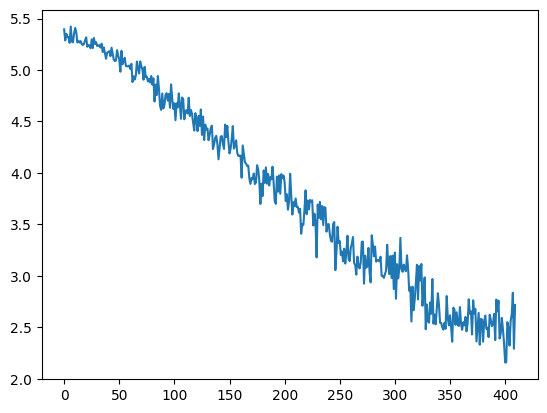

In [ ]:
# Your Code Here
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, betas=(0.9, 0.999), eps=1e-08, weight_decay=0)
loss_fn = nn.CrossEntropyLoss()

losses = []
for epoch in range(5):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        loss = loss_fn(outputs, labels-1)
        loss.backward()
        optimizer.step()

        # print statistics
        losses.append(loss.item())
        running_loss += loss.item()
        if i % 20 == 19:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 20))
            running_loss = 0.0

print('Finished Training')
plt.plot(losses)



Accuracy: 23.789895709590077


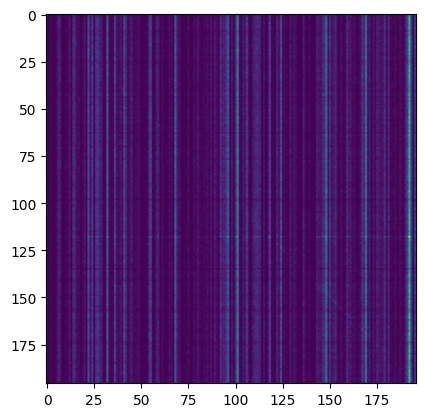

In [ ]:
model.eval()

class_correct = list(0. for i in range(196))
class_total = list(0. for i in range(196))
confusion_matrix = np.zeros((196,196))

with torch.no_grad():
    for data in testloader:
        images, labels = data
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        _, predicted = torch.max(outputs, 1)

        c = (predicted == labels-1).squeeze()

        for i in range(len(labels)):
          for j in range(len(predicted)):
            confusion_matrix[labels[i]-1][predicted[j]] += 1


        for i in range(len(labels)):
            label = labels[i-1]
            class_correct[label-1] += c[i].item()
            class_total[label-1] += 1

total_accuracy = 0
for i in range(196):
    total_accuracy += (100 * class_correct[i] / class_total[i])
total_accuracy = total_accuracy/196
print("\n")
print("Accuracy: " + str(total_accuracy))
plt.imshow(confusion_matrix)

Learning rate of .0001

In [ ]:
model = torchvision.models.resnet18(pretrained=True)
num_features = model.fc.in_features

# Additional linear layer and dropout layer
model.fc = nn.Sequential(
    nn.Linear(num_features, 256),  # Additional linear layer with 256 output features
    nn.ReLU(inplace=True),         # Activation function (you can choose other activation functions too)
    nn.Dropout(0.5),               # Dropout layer with 50% probability
    nn.Linear(256, 196)    # Final prediction fc layer
)
model = model.to(device)

[1,    20] loss: 5.293
[1,    40] loss: 5.235
[1,    60] loss: 5.179
[1,    80] loss: 5.102
[2,    20] loss: 4.881
[2,    40] loss: 4.804
[2,    60] loss: 4.720
[2,    80] loss: 4.587
[3,    20] loss: 4.274
[3,    40] loss: 4.135
[3,    60] loss: 4.018
[3,    80] loss: 3.907
[4,    20] loss: 3.493
[4,    40] loss: 3.428
[4,    60] loss: 3.292
[4,    80] loss: 3.226
[5,    20] loss: 2.774
[5,    40] loss: 2.691
[5,    60] loss: 2.593
[5,    80] loss: 2.470
Finished Training


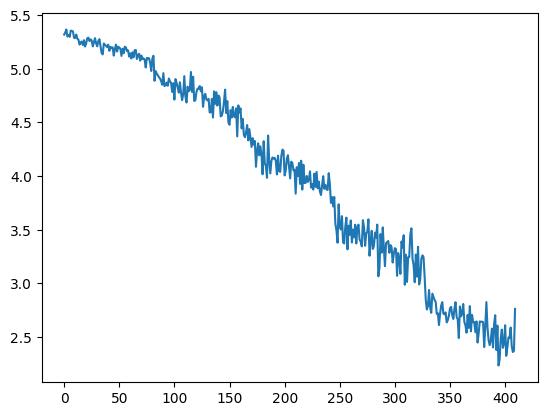

In [ ]:
# Your Code Here
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001, betas=(0.9, 0.999), eps=1e-08, weight_decay=0)
loss_fn = nn.CrossEntropyLoss()

losses = []
for epoch in range(5):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        loss = loss_fn(outputs, labels-1)
        loss.backward()
        optimizer.step()

        # print statistics
        losses.append(loss.item())
        running_loss += loss.item()
        if i % 20 == 19:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 20))
            running_loss = 0.0

print('Finished Training')
plt.plot(losses)



Accuracy: 49.511678747954015


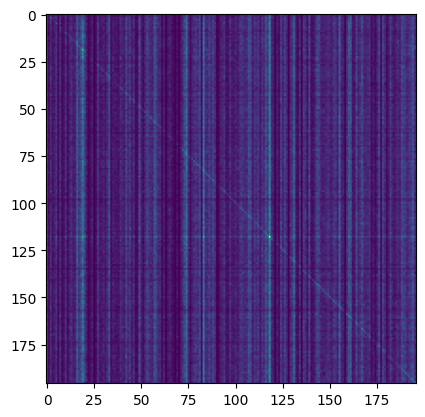

In [ ]:
model.eval()

class_correct = list(0. for i in range(196))
class_total = list(0. for i in range(196))
confusion_matrix = np.zeros((196,196))

with torch.no_grad():
    for data in testloader:
        images, labels = data
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        _, predicted = torch.max(outputs, 1)

        c = (predicted == labels-1).squeeze()

        for i in range(len(labels)):
          for j in range(len(predicted)):
            confusion_matrix[labels[i]-1][predicted[j]] += 1


        for i in range(len(labels)):
            label = labels[i-1]
            class_correct[label-1] += c[i].item()
            class_total[label-1] += 1

total_accuracy = 0
for i in range(196):
    total_accuracy += (100 * class_correct[i] / class_total[i])
total_accuracy = total_accuracy/196
print("\n")
print("Accuracy: " + str(total_accuracy))
plt.imshow(confusion_matrix)